## Example Class Test on Plant Transcription Factors (from Resit August 2024)

With worked answers

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lucy is interested in the evolution of the ARP family of genes.  These are single copy in most species and encode a protein about 370 aminos acids long.  There's more infomation about them here:

https://www.uniprot.org/uniprotkb/O80931/entry


![alternative text](AS1.png)

NCBI (National Centeral for Biological Infomation) maintains a database of all protein sequences.  BLAST is a program which searches this database looking for matches.  Matches are given a score for the number of matches, mismatches and gaps, the percentage identity to the search protein, and the chances of finding a match as good as this in the database by chance alone (e-value/E()).




Lucy has searched the NCBI database with two different ARP genes to find all the ARP-like protiens.  AS1 is an ARP family gene from Arabidopsis, BARP2 is an ARP family gene from Begonia.  

The blast hits for AS1 are in :
AS1_NCBI.csv

The blast hits for BARP2 are in
BARP2_NCBI.tsv
    
AS1_NCBI.csv is comma delineated.  It does not have a header row, but the columns are:
    
 *Description*,	Infomation about the protien which has matched  
 *Scientific Name*,	Species the match comes from   
 *Common Name*,	common name of the species the match comes from  
 *Score(Bits)*,	Score for the match (higher = better)  
 *Query Cover*,	The percentage of the Query sequence covered by the match  
 *E()*,	The e-value of the match (likelihood of match by chance alone)  
 *Identities(%)*,	The percentage of identical amino acids in the match  
 *Length*,	The length of the matched protiein (in amino acids)  
 *Accession*, The unique accession number of hte matched protein in the NCBI database  
    
ARP2_NCBI.tsv is tab delineated.  It does have a header row.  

*Hit*	The number of the match in the blast output  
*DB*	Code for the database searched  
*Accession*	The unique accession number of hte matched protein in the NCBI database  
*Description*	Infomation about the protien which has matched  
*Organism*	Species the match comes from   
*Length*	The length of the matched protien (in amino acids)  
*Score(Bits)*	Score for the match (higher = better)  
*Identities(%)*	The percentage of identical amino acids in the match  
*Positives(%)*	The percentage of similar amino acids in the match  
*E()* The e-value of the match (likelihood of match by chance alone)  


She needs to combine the results of these searches into a single dataframe listing all the ARP proteins found.  
She needs see how common gene duplication is for this protein.  
She needs to see if there is any evidence that after gene duplication there are changes in the protiens, such as loss/gain of sequence.

#### Checking the searches.  

Read in both files, adding a header row to AS1_NCBI.csv.  Check the head and tail of the dataframes to be sure they've read in correctly

In [6]:
col_list = ['Description','Organism', 'Name', 'Score(Bits)' ,'Query_Coverage', 'E()', 'Identities(%)', 'Length', 'Accession']
df_AS = pd.read_csv('AS1_NCBI.csv', header = None, names = col_list)
df_AS

,Description,Organism,Name,Score(Bits),Query_Coverage,E(),Identities(%),Length,Accession
0,myb-like HTH transcriptional regulator family ...,Arabidopsis thaliana,thale cress,746,100%,0.000000e+00,100.00,367,NP_181299.1
1,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,736,100%,0.000000e+00,98.64,368,XP_002881522.1
2,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,735,100%,0.000000e+00,98.64,368,XP_002881519.1
3,transcription factor AS1 [Capsella rubella],Capsella rubella,NaN,721,100%,0.000000e+00,96.47,368,XP_006294459.1
4,PREDICTED: transcription factor AS1 [Camelina ...,Camelina sativa,false flax,717,100%,0.000000e+00,95.66,369,XP_010505355.1
...,...,...,...,...,...,...,...,...,...
995,transcription factor AS1-like [Sesamum indicum],Sesamum indicum,sesame,176,56%,1.000000e-49,51.44,200,XP_020553291.1
996,protein rough sheath 2 homolog [Phoenix dactyl...,Phoenix dactylifera,date palm,180,37%,1.000000e-49,63.83,324,XP_008791227.2
997,hypothetical protein ZWY2020_054584 [Hordeum v...,Hordeum vulgare,NaN,179,74%,2.000000e-49,43.22,322,KAI4965441.1
998,protein rough sheath 2 [Cocos nucifera],Cocos nucifera,coconut palm,270,68%,4.000000e-49,63.57,325,KAG1347003.1


In [ ]:
df_AS.head(3)

In [3]:
df_AS.tail(3)

,Description,Organism,Name,Score(Bits),Query_Coverage,E(),Identities(%),Length,Accession
997,hypothetical protein ZWY2020_054584 [Hordeum v...,Hordeum vulgare,NaN,179,74%,2.000000e-49,43.22,322,KAI4965441.1
998,protein rough sheath 2 [Cocos nucifera],Cocos nucifera,coconut palm,270,68%,4.000000e-49,63.57,325,KAG1347003.1
999,"ASYMMETRIC LEAVES 1, LOTUS LEAF 2, ARABIDOPSIS...",Hibiscus trionum,NaN,172,29%,4.000000e-49,78.18,123,GMI77736.1


In [4]:
df_B2 = pd.read_table('BARP2_NCBI.tsv')
df_B2.head(3)

,Hit,DB,Accession,Description,Organism,Length,Score(Bits),Identities(%),Positives(%),E()
0,1,TR,A0A1R3H7S3,SANT/Myb domain-containing protein OS=Corchoru...,Corchorus capsularis,357,784,70.6,82.0,1.500000e-101
1,2,TR,A0A1R3JQT3,SANT/Myb domain-containing protein OS=Corchoru...,Corchorus olitorius,357,779,70.1,81.5,8.400000e-101
2,3,TR,A0A067KHN5,MYB family protein OS=Jatropha curcas OX=18049...,Jatropha curcas,357,776,69.2,82.9,2.400000e-100


In [5]:
df_B2.tail(3)

,Hit,DB,Accession,Description,Organism,Length,Score(Bits),Identities(%),Positives(%),E()
997,998,TR,L1L173,M protein repeat protein OS=Streptomyces ipomo...,Streptomyces ipomoeae 91-03,1282,107,30.2,49.1,0.023
998,999,TR,A0A494V507,Large Ala/Glu-rich protein OS=Streptomyces fun...,Streptomyces fungicidicus,1293,107,30.8,51.4,0.023
999,1000,TR,A0A919BA18,DUF2637 domain-containing protein OS=Streptomy...,Streptomyces mashuensis,368,106,31.1,48.4,0.023


These hits include several cases where different protiens from the same species are found.  

In [7]:
df_AS['Organism'].nunique()

468

In [8]:
df_B2['Organism'].nunique()

503

<div class = "alert alert-danger">
Q2 How many unique species (labeled 'organisms' in the dataframe) are in the the AS1 searches?

    a 332
    b 172
    c 729
    Xd 468
    e 513
    
Enter your answer on LEARN

Have AS1 and BARP2 found matches in different ranges of species?  Find the overlap in species between the two dataframes.  

Useful commands:

    .unique()
    set(x) - set(y)

In [9]:
sp_AS1 = df_AS['Organism'].unique()
sp_B2 = df_B2['Organism'].unique()

In [12]:
set(sp_AS1) - set(sp_B2)

{'Abies firma',
 'Acacia hindsii',
 'Acacia pycnantha',
 'Acer negundo',
 'Acer saccharum',
 'Actinidia deliciosa',
 'Actinidia eriantha',
 'Amana edulis',
 'Amaranthus tricolor',
 'Ambrosia artemisiifolia',
 'Amphilophium buccinatorium',
 'Andrographis paniculata',
 'Anisodus acutangulus',
 'Antirrhinum majus',
 'Apatesia helianthoides',
 'Aquilegia formosa',
 'Arachis ipaensis',
 'Arachis stenosperma',
 'Aristolochia fimbriata',
 'Asparagus asparagoides',
 'Bauhinia variegata',
 'Benincasa hispida',
 'Bignonia callistegioides',
 'Brassica rapa',
 'Brassica rapa subsp. trilocularis',
 'Buddleja alternifolia',
 'Camelina sativa',
 'Camellia lanceoleosa',
 'Caragana korshinskii',
 'Cardamine hirsuta',
 'Carica papaya',
 'Carnegiea gigantea',
 'Carruanthus ringens',
 'Carthamus tinctorius',
 'Catalpa bungei',
 'Catharanthus roseus',
 'Cathaya argyrophylla',
 'Causonis australasica',
 'Causonis clematidea',
 'Causonis corniculata',
 'Causonis daliensis',
 'Causonis fugongensis',
 'Causoni

In [13]:
set(sp_B2) - set(sp_AS1)

{'Acanthisitta chloris',
 'Acidomonas methanolica NBRC 104435',
 'Acipenser ruthenus',
 'Aegithalos caudatus',
 'Alca torda',
 'Aleadryas rufinucha',
 'Alectura lathami',
 'Aliiglaciecola sp. M165',
 'Ameiurus melas',
 'Amphibalanus amphitrite',
 'Amphiprion ocellaris',
 'Amphiprion percula',
 'Anabarilius grahami',
 'Angomonas deanei',
 'Anseranas semipalmata',
 'Antrostomus carolinensis',
 'Ardeotis kori',
 'Armillaria gallica',
 'Armillaria ostoyae',
 'Armillaria solidipes',
 'Aspergillus leporis',
 'Aspergillus rambellii',
 'Aspergillus tanneri',
 'Astyanax mexicanus',
 'Bacterioplanes sanyensis',
 'Bagarius yarrelli',
 'Balearica regulorum gibbericeps',
 'Baryphthengus martii',
 'Bathycoccus prasinos',
 'Betta splendens',
 'Blastocystis hominis',
 'Blastocystis sp. subtype 1 (strain ATCC 50177 / NandII)',
 'Bondarzewia mesenterica',
 'Bos indicus',
 'Bos indicus x Bos taurus',
 'Bos taurus',
 'Botrytis porri',
 'Bucco capensis',
 'Bucorvus abyssinicus',
 'Burhinus bistriatus',
 'B

In [14]:
len(set(sp_B2) - set(sp_AS1))

340

In [15]:
len(set(sp_AS1) - set(sp_B2))

305

<div class = "alert alert-danger">
Q3 The number of species found in the AS1 search, but not in the BARP1 search is:

    a 23
    b 75
    c 156
    d 254
    Xe 305
    
Enter your answer on LEARN

#### Combine the dataframes  
Simplify the dataframes so they contain only the following columns:  
'Accession', 'Organism', 'Length', 'Score(Bits)', 'Identities(%)', 'E()'

In [16]:
B2 = df_B2[['Accession', 'Organism', 'Length', 'Score(Bits)', 'Identities(%)', 'E()']]

In [17]:
AS = df_AS[['Accession', 'Organism', 'Length', 'Score(Bits)', 'Identities(%)', 'E()']]

Concatenate the dataframes vertically to add the AS1 search to the BARP2 search.  
You will need to re-set the index.

In [18]:
df = pd.concat([B2, AS], axis = 0).reset_index(drop=True)
df.head(3)

,Accession,Organism,Length,Score(Bits),Identities(%),E()
0,A0A1R3H7S3,Corchorus capsularis,357,784,70.6,1.500000e-101
1,A0A1R3JQT3,Corchorus olitorius,357,779,70.1,8.400000e-101
2,A0A067KHN5,Jatropha curcas,357,776,69.2,2.400000e-100


In [19]:
df.tail(3)

,Accession,Organism,Length,Score(Bits),Identities(%),E()
1997,KAI4965441.1,Hordeum vulgare,322,179,43.22,2.000000e-49
1998,KAG1347003.1,Cocos nucifera,325,270,63.57,4.000000e-49
1999,GMI77736.1,Hibiscus trionum,123,172,78.18,4.000000e-49


In [21]:
len(df['Organism'].unique().tolist())

808

<div class = "alert alert-danger">
Q4 The number of unique species in this joint dataframe is:

    a 152
    b 267
    c 532
    Xd 808
    e 1325
    
Enter your answer on LEARN

#### Plot the scores  
The Blast Score counts up the number of exact matches, near matches, mis-matches and gaps in an alignment.  'Real' matches have high scores. However, matches which are less likely to be the same protein, or are in very evolutionary distant species, have lower scores. Usually this is detected by a cut-off in the distribution of scores, below which the number of detected scores sharply increases.

Examine the distribution of scores in the combined dataframe, to see if there is a cut-off which we can use to filter the real ARP proteins from other similar proteins.

<div class = "alert alert-danger">
Q5 Plot a histogram of Blast Scores.  Label the x and y axis and give the graph an appropriate title.  
   Upload the plot to LEARN (2 marks)

Text(0.5, 1.0, 'Distribution of Blast Scores')

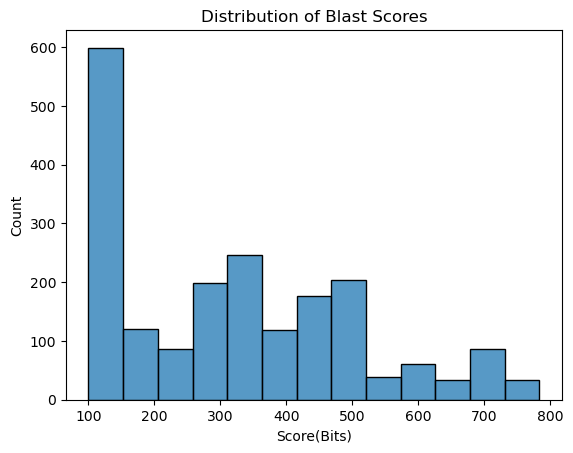

In [22]:
sns.histplot(data=df, x='Score(Bits)').set_title('Distribution of Blast Scores')

<div class = "alert alert-danger">
Q6 A reasonable cut-off for 'good hits' is:

    a >250
    b >375
    Xc >500
    d >650
    e >700
    
Enter your answer on LEARN

#### Filtering. 
Filter the dataframe to remove poor hits

In [24]:
good_result = df[df['Score(Bits)'] > 500]

In [25]:
good_result.head(3)

,Accession,Organism,Length,Score(Bits),Identities(%),E()
0,A0A1R3H7S3,Corchorus capsularis,357,784,70.6,1.500000e-101
1,A0A1R3JQT3,Corchorus olitorius,357,779,70.1,8.400000e-101
2,A0A067KHN5,Jatropha curcas,357,776,69.2,2.400000e-100


#### How many copies in each species?  
To find the number of copies of ARP genes in each species we need to group the dataframe by species and count the records.  

    use .groupby() and .count()

In [26]:
copies =good_result.groupby(by=["Organism"]).count()

In [27]:
copies.shape

(160, 5)

In [28]:
copies.head(3)

,Accession,Length,Score(Bits),Identities(%),E()
Organism,,,,,
Abrus precatorius,3,3,3,3,3
Acer yangbiense,1,1,1,1,1
Actinidia chinensis var. chinensis,2,2,2,2,2


Tidy this dataframe so you have only two columns - 'Organism' and a single column of counts which is the copy number.  Rename this column 'Copy_number'.  Reset the index.

In [29]:
gr = copies.loc[:,[ 'Accession']]

In [30]:
gr = gr.rename(columns={'Accession':'Copy_number'})
gr = gr.reset_index()
gr.head(3)

,Organism,Copy_number
0,Abrus precatorius,3
1,Acer yangbiense,1
2,Actinidia chinensis var. chinensis,2


<div class = "alert alert-danger">
Q7 Make a histogram to show the count of copies per species. 
    Label the y-axis "Copy number of ARP per species", give an appropriate title.   
    
Upload the plot to LEARN (2 marks)

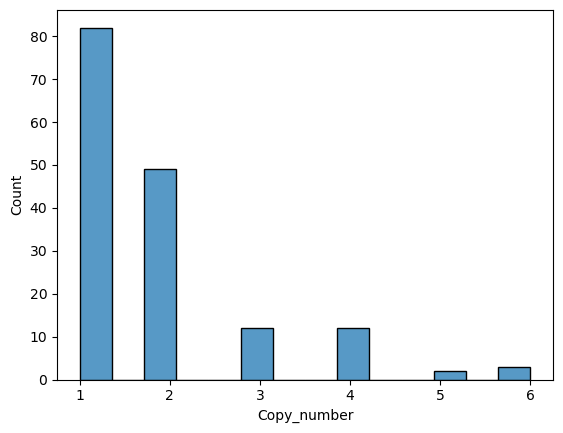

In [32]:
# example of defaoult histplot has strange bin widths
ax = sns.histplot(data=gr, x="Copy_number")

[Text(0.5, 1.0, 'Duplication of ARP genes')]

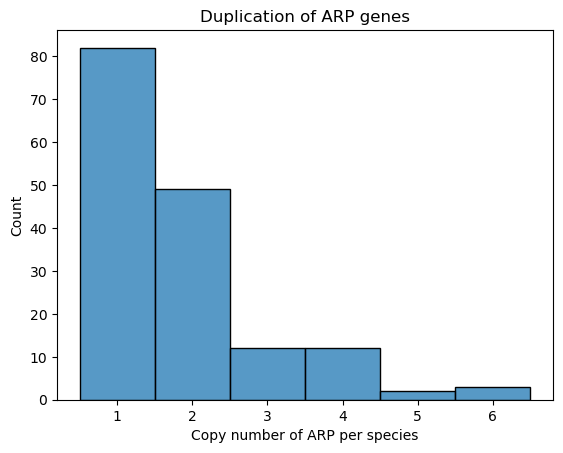

In [33]:
# here we make the bin ranges look better, as well as giving the title and y-axis label
ax = sns.histplot(data=gr, x="Copy_number", binwidth = 1, binrange = [0.5, 6.5])
ax.set(xlabel='Copy number of ARP per species')
ax.set(title='Duplication of ARP genes')

Subset the dataframe to find the species with a copy number of over 4.

In [35]:
gr[gr["Copy_number"] >4 ]

,Organism,Copy_number
12,Brassica carinata,6
14,Brassica napus,6
16,Brassica rapa,5
82,Hibiscus syriacus,5
157,Zingiber officinale,6


<div class = "alert alert-danger">
Q8 In this list, which species has the most copies of the ARP gene?

    a Ananas comosus
    b Vigna angularis var. angularis
    Xc Zingiber officinale
    d Ziziphus jujuba
    e Tripterygium wilfordii
    
Enter your answer on LEARN

Join the copy number dataframe to the hit-score (good hits) filtered dataframe:  

Columns should now be:

        Accession	Organism	Length	Score(Bits)	Identities(%)	E()	Copy_number
        
With one row for each Accession.

In [36]:
df3 = good_result.join(gr.set_index('Organism'), on='Organism')

In [37]:
df3.head(3)

,Accession,Organism,Length,Score(Bits),Identities(%),E(),Copy_number
0,A0A1R3H7S3,Corchorus capsularis,357,784,70.6,1.500000e-101,1
1,A0A1R3JQT3,Corchorus olitorius,357,779,70.1,8.400000e-101,1
2,A0A067KHN5,Jatropha curcas,357,776,69.2,2.400000e-100,3


#### What happens to duplicated ARP proteins 
Is there more sequence variation where there are multiple copies of ARP?

<div class = "alert alert-danger">
Q9 Make a violinplot to show the % Identity by copy number.  Use the palette 'summer'. Label the X and Y axes and give an appropriate title.
    
    
   Upload the plot to LEARN (2 marks)

Text(0.5, 1.0, 'ARP gene variation by copy number')

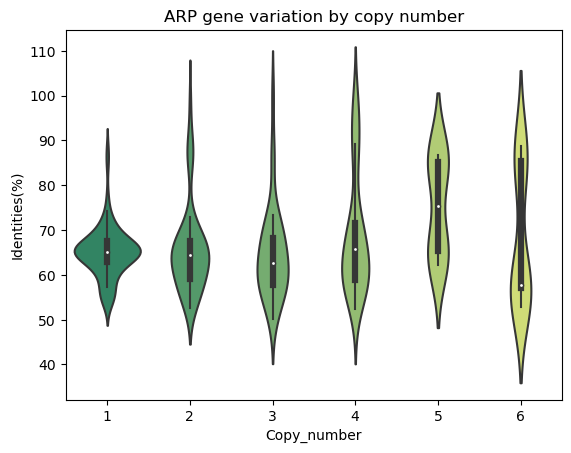

In [38]:
sns.violinplot(data=df3, y="Identities(%)", x = "Copy_number", palette='summer').set_title('ARP gene variation by copy number')

#### Is there a pattern to the length of ARP proteins?

Sometimes BLAST hits detect a full-length protein and sometimes a truncated protein. It's important to distinguish these, and truncated proteins may have a different function or have lost function. Usually, full-length proteins will have similar lengths to one another, and truncated proteins will be clearly shorter.

Using the filtered data frame of good hits, next investigate the length of ARP proteins.  

<div class = "alert alert-danger">
Q10 Plot a histogram of the length of ARP proteins in amino acids.  Bin the data into 50 bins and make the bars green.   Label the X and Y axes and give an appropriate title.
    
    
   Upload the plot to LEARN (2 marks)

[Text(0.5, 1.0, 'ARP protein length')]

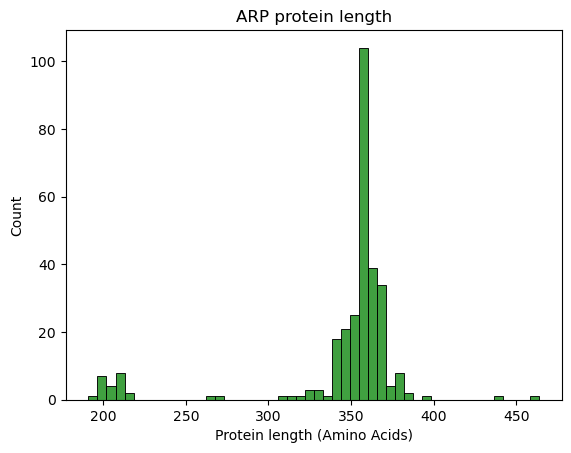

In [40]:
ax = sns.histplot(data=df3, x="Length", bins=50, color='green')
ax.set(xlabel='Protein length (Amino Acids)')
ax.set(title='ARP protein length')

<div class = "alert alert-danger">
Q11 What is a good dividing line between truncated and full length ARP proteins?

    a 200 amino acids long
    b 300 amino acids long
    c 350 amino acids long
    d 450 amino acids long
    e 500 amino acids long
    
Enter your answer on LEARN (1 mark)

Is there any evidence that the short proteins are not real ARP proteins?  Plot identity by length in a scatter plot.

<div class = "alert alert-danger">
Q12 Plot identity by length in a scatter plot.  Use jointplot to show historgrams as well, and make the points small enough to distinguish (for example s=5).  Label the X and Y axes and give an appropriate title.
    
As this is a jointplot you have to set the title and labels with:
    `ax.fig.suptitle('Title here')`
    `ax.set_axis_labels('X label', 'Y label')`
    
    
   Upload the plot to LEARN (2 marks)

Text(0.5, 0.98, 'ARP protein variation')

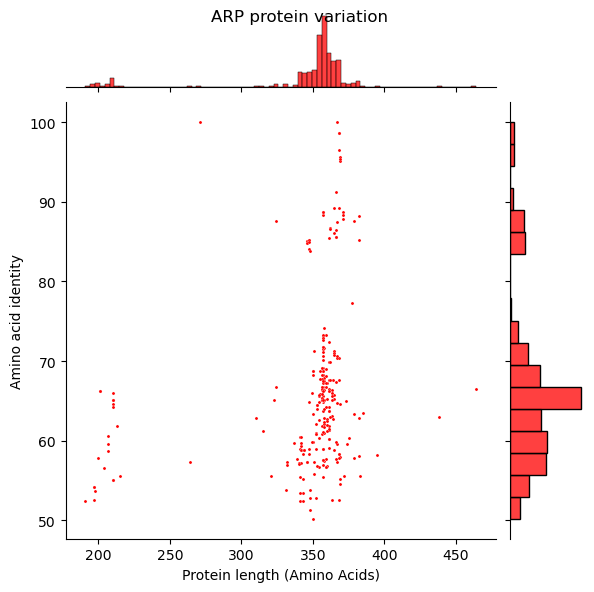

In [42]:
ax = sns.jointplot(data=df3, x="Length", y = "Identities(%)", color = 'red', s=5)
ax.set_axis_labels('Protein length (Amino Acids)', 'Amino acid identity')
ax.fig.suptitle('ARP protein variation')

Catagorise each protein as full length or truncated in a new column called 'Size'.  
Use DataFrame.loc[] to assign values based on a conditional  of your choice.

In [43]:
df3.loc[df3['Length'] < 300, 'Size'] = 'Truncated'
df3.loc[df3['Length'] > 300, 'Size'] = 'Full'


<div class = "alert alert-danger">
Q13 Which of these species has only truncated ARP genes?  Look up the matching dataframe rows to check.
    
    a Sesamum indicum
    b Solanum lycopersicum
    Xc Momordica charantia
    d Phtheirospermum japonicum
    e Daucus carota subsp. sativus
    
Enter your answer on LEARN (2 marks)

In [54]:
df3.loc[df3['Organism'].isin(['Sesamum indicum', 'Solanum lycopersicum', 'Momordica charantia', 'Phtheirospermum japonicum', 'Daucus carota subsp. sativus'])]

,Accession,Organism,Length,Score(Bits),Identities(%),E(),Copy_number,Size
36,A0A6J1CVZ3,Momordica charantia,210,713,65.1,6.800000e-93,1,Truncated
94,A0A3Q7HZZ1,Solanum lycopersicum,360,695,62.7,4.900000e-88,3,Full
134,A0A6I9T3V8,Sesamum indicum,361,638,59.1,2.100000e-79,2,Full
136,A0A162AFT2,Daucus carota subsp. sativus,352,632,61.0,1.300000e-78,3,Full
146,A0A164YJS4,Daucus carota subsp. sativus,360,610,56.8,3.400000e-75,3,Full
162,A0A494G8W5,Solanum lycopersicum,264,580,57.3,6.300000e-72,3,Truncated
163,A0A8M8VAY3,Sesamum indicum,200,574,57.8,6.500000e-72,2,Truncated
174,A0A164WHI5,Daucus carota subsp. sativus,204,566,56.6,1.200000e-70,3,Truncated
196,A0A830C7B9,Phtheirospermum japonicum,321,556,55.6,1.500000e-67,2,Full
197,A0A830D4M1,Phtheirospermum japonicum,197,533,52.6,9.900000e-66,2,Truncated


In [46]:
# could also do a df3.groupby('Organism'), then summarize the counts of full and truncated per species

#### Do the truncated proteins show more variation than full length proteins?

Compare the average identity for short and long proteins.

In [55]:
df3.groupby(['Size']).mean()

/tmp/ipykernel_205/2342808954.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby(['Size']).mean()


,Length,Score(Bits),Identities(%),E(),Copy_number
Size,,,,,
Full,357.708955,637.108209,66.759067,3.733291e-61,2.582090
Truncated,210.416667,609.625000,61.175000,1.462541e-62,1.833333


<div class = "alert alert-danger">
Q14 Use a t-test to see if truncated proteins are less similar to ARP than full length proteins (by %_Identity)

    a Yes, pvalue = 0.01
    b No, pvalue > 0.05
    c Yes, pvalue = 0.05
    d No, pvalue > 0.001
    e Yes, pvalue = 5%
    
Enter your answer on LEARN (2 marks)

In [56]:
from scipy.stats import ttest_ind
#define samples
group1 = df3[df3['Size']=='Full']
group2 = df3[df3['Size']=='Truncated']

#perform independent two sample t-test
ttest_ind(group1['Identities(%)'], group2['Identities(%)'])

TtestResult(statistic=2.5797254042613607, pvalue=0.01038018223328729, df=290.0)

<div class = "alert alert-danger">
Upload your notebook to LEARN